In [2]:
import numpy as np 
import pandas as pd 
import os
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [4]:
data = pd.read_csv("car_evaluation.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
X=data.drop(['class'],axis=1)

In [9]:
y_class=data.filter(['class'])
y_safety=data.filter(['safety'])
y_doors=data.filter(['doors'])
y_persons=data.filter(['persons'])
y_maint=data.filter(['maint'])
y_buying=data.filter(['buying'])
y_lug_boot=data.filter(['lug_boot'])

In [10]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [11]:
y_buying

,buying
0,vhigh
1,vhigh
2,vhigh
3,vhigh
4,vhigh
...,...
1723,low
1724,low
1725,low
1726,low


In [12]:
y_class

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [13]:
y_safety

,safety
0,low
1,med
2,high
3,low
4,med
...,...
1723,med
1724,high
1725,low
1726,med


In [14]:
y_maint

,maint
0,vhigh
1,vhigh
2,vhigh
3,vhigh
4,vhigh
...,...
1723,low
1724,low
1725,low
1726,low


In [15]:
y_lug_boot

,lug_boot
0,small
1,small
2,small
3,med
4,med
...,...
1723,med
1724,med
1725,big
1726,big


In [16]:
map_class = {
    "class":{
        "unacc":4,
        "acc":3,
        "good":2,
        "vgood":1
    }
}

In [17]:
map_lug_boot = {
    "lug_boot":{
        "small":3,
        "med":2,
        "big":1
    }
}

In [18]:
map_safety = {
    "safety":{
        "low":3,
        "med":2,
        "high":1
    }
}

In [19]:
map_buying = {
    "buying":{
        "low":4,
        "med":3,
        "high":2,
        "vhigh":1
    }
}

In [20]:
map_maint = {
    "maint":{
        "low":4,
        "med":3,
        "high":2,
        "vhigh":1
    }
}

In [21]:
y_class=y_class.replace(map_class)

In [22]:
y_buying=y_buying.replace(map_buying)

In [23]:
y_lug_boot=y_lug_boot.replace(map_lug_boot)

In [24]:
y_safety=y_safety.replace(map_safety)

In [25]:
y_maint=y_maint.replace(map_maint)

In [26]:
y_maint

,maint
0,1
1,1
2,1
3,1
4,1
...,...
1723,4
1724,4
1725,4
1726,4


In [27]:
y_safety

,safety
0,3
1,2
2,1
3,3
4,2
...,...
1723,2
1724,1
1725,3
1726,2


In [28]:
y_lug_boot

,lug_boot
0,3
1,3
2,3
3,2
4,2
...,...
1723,2
1724,2
1725,1
1726,1


In [29]:
y_buying

,buying
0,1
1,1
2,1
3,1
4,1
...,...
1723,4
1724,4
1725,4
1726,4


In [30]:
y_class

,class
0,4
1,4
2,4
3,4
4,4
...,...
1723,2
1724,1
1725,4
1726,2


In [31]:
X['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [32]:
X['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [33]:
X = pd.get_dummies(X)

In [34]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [35]:
def correlation(hemanth,thresold):
    data=hemanth.corr()
    corr_features= set()
    for i in range(len(data.columns)):
        for j in range(i):
            if(abs(data.iloc[i,j])>thresold):
                colname=data.columns[i]
                corr_features.add(colname) 
    return corr_features

In [36]:
features= correlation(X,0.7)

In [37]:
features

set()

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [39]:
X_train_LR,X_test_LR,y_train_LR,y_test_LR = train_test_split(X,y_class,test_size= 0.2,random_state=100)

In [40]:
logi=logreg.fit(X_train_LR,y_train_LR)

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
pred_LR=logreg.predict(X_test_LR)

In [42]:
print("Accuracy = ", accuracy_score(y_test_LR,pred_LR))
print("Precision = ", precision_score(y_test_LR,pred_LR, average='macro'))
print("recall = ", recall_score(y_test_LR,pred_LR, average='macro'))
print("f1-score = ", f1_score(y_test_LR,pred_LR, average='macro'))
print("Logistic Regression = \n ", classification_report(y_test_LR,pred_LR))

Accuracy =  0.9017341040462428
Precision =  0.8382989844683393
recall =  0.7456383090870757
f1-score =  0.7764955237678198
Logistic Regression = 
                precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.78      0.41      0.54        17
           3       0.74      0.83      0.78        72
           4       0.96      0.96      0.96       248

    accuracy                           0.90       346
   macro avg       0.84      0.75      0.78       346
weighted avg       0.90      0.90      0.90       346



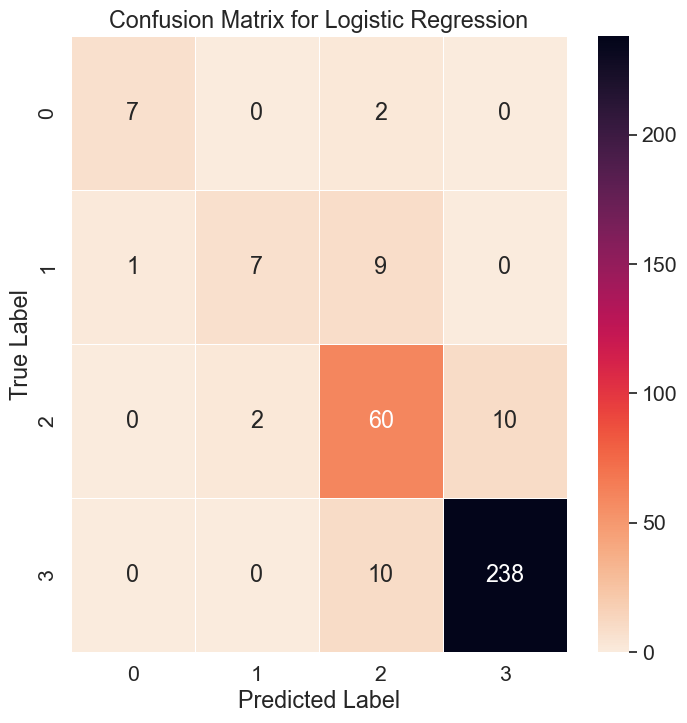

In [43]:
logreg_matrix = confusion_matrix(y_test_LR,pred_LR)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(logreg_matrix,annot=True, cbar=True, cmap='rocket_r',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

# K-Nearest Neighbour (KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)

In [45]:
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X,y_class,test_size= 0.2,random_state=100)

In [46]:
knn.fit(X_train_knn,y_train_knn)
pred_knn=knn.predict(X_test_knn)

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
print("Accuracy = ",accuracy_score(y_test_knn,pred_knn))
print("Precision = ",precision_score(y_test_knn,pred_knn,average='macro'))
print("recall = ",recall_score(y_test_knn,pred_knn,average='macro'))
print("f1-score = ",f1_score(y_test_knn,pred_knn,average='macro'))
print("K-Nearest Neighbour (KNN) = \n ",classification_report(y_test_knn,pred_knn))

Accuracy =  0.8670520231213873
Precision =  0.6937316222858585
recall =  0.6141418933164664
f1-score =  0.6387958446781976
K-Nearest Neighbour (KNN) = 
                precision    recall  f1-score   support

           1       0.38      0.33      0.35         9
           2       0.78      0.41      0.54        17
           3       0.67      0.76      0.71        72
           4       0.95      0.95      0.95       248

    accuracy                           0.87       346
   macro avg       0.69      0.61      0.64       346
weighted avg       0.87      0.87      0.86       346



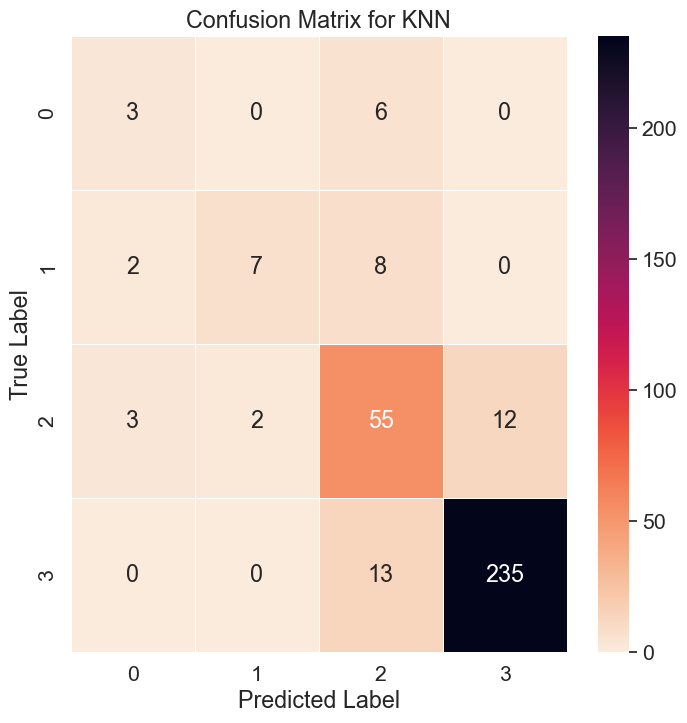

In [48]:
KNN_matrix = confusion_matrix(y_test_knn,pred_knn)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
#sns.heatmap(KNN_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
sns.heatmap(KNN_matrix,annot=True, cbar=True,cmap='rocket_r',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN');

# Support Vector Machine

In [49]:
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X,y_class,test_size= 0.2,random_state=100)

In [50]:
from sklearn.svm import SVC
svm = SVC( kernel = 'rbf')
svm = svm.fit(X_train_svm,y_train_svm)

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
 y_pred_svm = svm.predict(X_test_svm)

In [52]:
print("Accuracy = ",metrics.accuracy_score(y_test_svm,y_pred_svm))
print("Precision = ",precision_score(y_test_svm,y_pred_svm,average='macro'))
print("recall = ",recall_score(y_test_svm,y_pred_svm,average='macro'))
print("f1-score = ",f1_score(y_test_svm,y_pred_svm,average='macro'))
print("Support Vector Machine (SVM) = \n ", classification_report(y_test_svm,y_pred_svm))

Accuracy =  0.9624277456647399
Precision =  0.9210088691796009
recall =  0.9022440965633565
f1-score =  0.8988868274582561
Support Vector Machine (SVM) = 
                precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.65      0.79        17
           3       0.87      0.99      0.92        72
           4       1.00      0.98      0.99       248

    accuracy                           0.96       346
   macro avg       0.92      0.90      0.90       346
weighted avg       0.97      0.96      0.96       346



In [53]:
cm = np.array(confusion_matrix(y_test_svm, y_pred_svm))
confusion = pd.DataFrame(cm)
confusion

,0,1,2,3
0,9,0,0,0
1,1,11,5,0
2,1,0,71,0
3,0,0,6,242


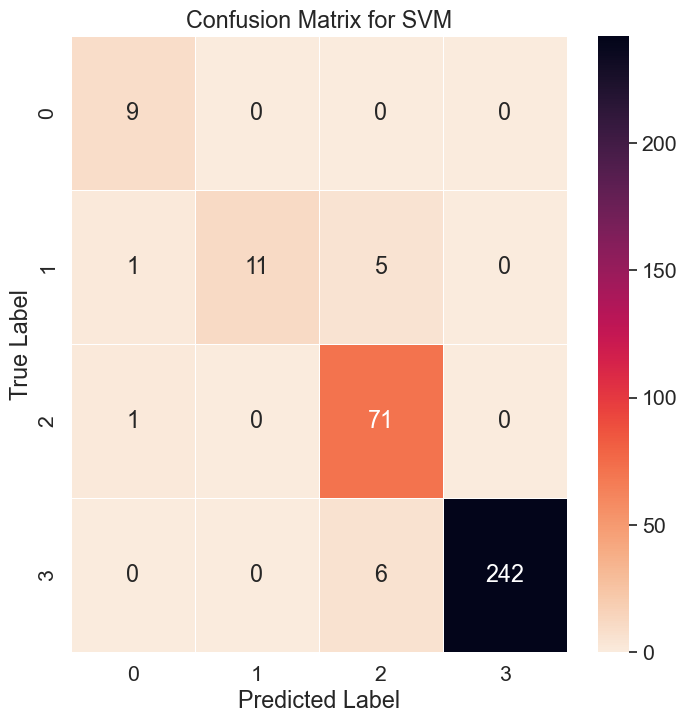

In [54]:
svm_matrix = confusion_matrix(y_test_svm,y_pred_svm)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(svm_matrix,annot=True, cbar=True, cmap='rocket_r',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for SVM');

# Decision tree

In [55]:
X_train_DT,X_test_DT,y_train_DT,y_test_DT = train_test_split(X,y_class,test_size= 0.2,random_state=100)

In [56]:
#clf = tree.DecisionTreeClassifier(criterion='gini')

# pruning
clf = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes = 20, min_samples_leaf = 2, max_depth= 10)

clf = clf.fit(X_train_DT,y_train_DT)

In [57]:
 y_pred_decision = clf.predict(X_test_DT)

In [58]:
print("Accuracy = ",metrics.accuracy_score(y_test_DT,y_pred_decision))
print("Precision = ",precision_score(y_test_DT, y_pred_decision,average='macro'))
print("recall = ",recall_score(y_test_DT, y_pred_decision,average='macro'))
print("f1-score = ",f1_score(y_test_DT, y_pred_decision,average='macro'))
print("Decision tree = \n ", classification_report(y_test_DT,y_pred_decision))

Accuracy =  0.9364161849710982
Precision =  0.9127632783882784
recall =  0.7848408180476492
f1-score =  0.8143841464977826
Decision tree = 
                precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       1.00      0.41      0.58        17
           3       0.78      0.99      0.87        72
           4       1.00      0.96      0.98       248

    accuracy                           0.94       346
   macro avg       0.91      0.78      0.81       346
weighted avg       0.95      0.94      0.93       346



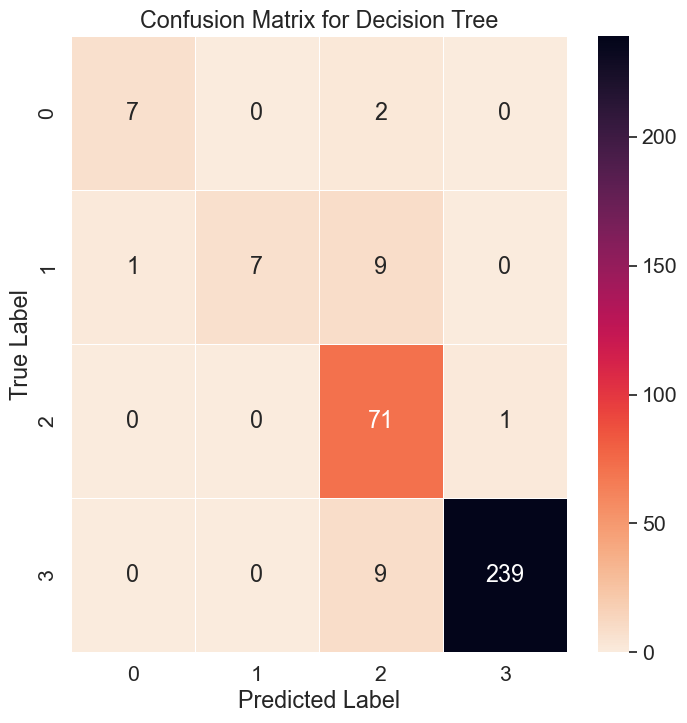

In [59]:
DT_matrix = confusion_matrix(y_test_DT,y_pred_decision)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(DT_matrix,annot=True, cbar=True, cmap='rocket_r',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree');

In [60]:
text_representation = tree.export_text(clf)
#print(text_representation)

In [61]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

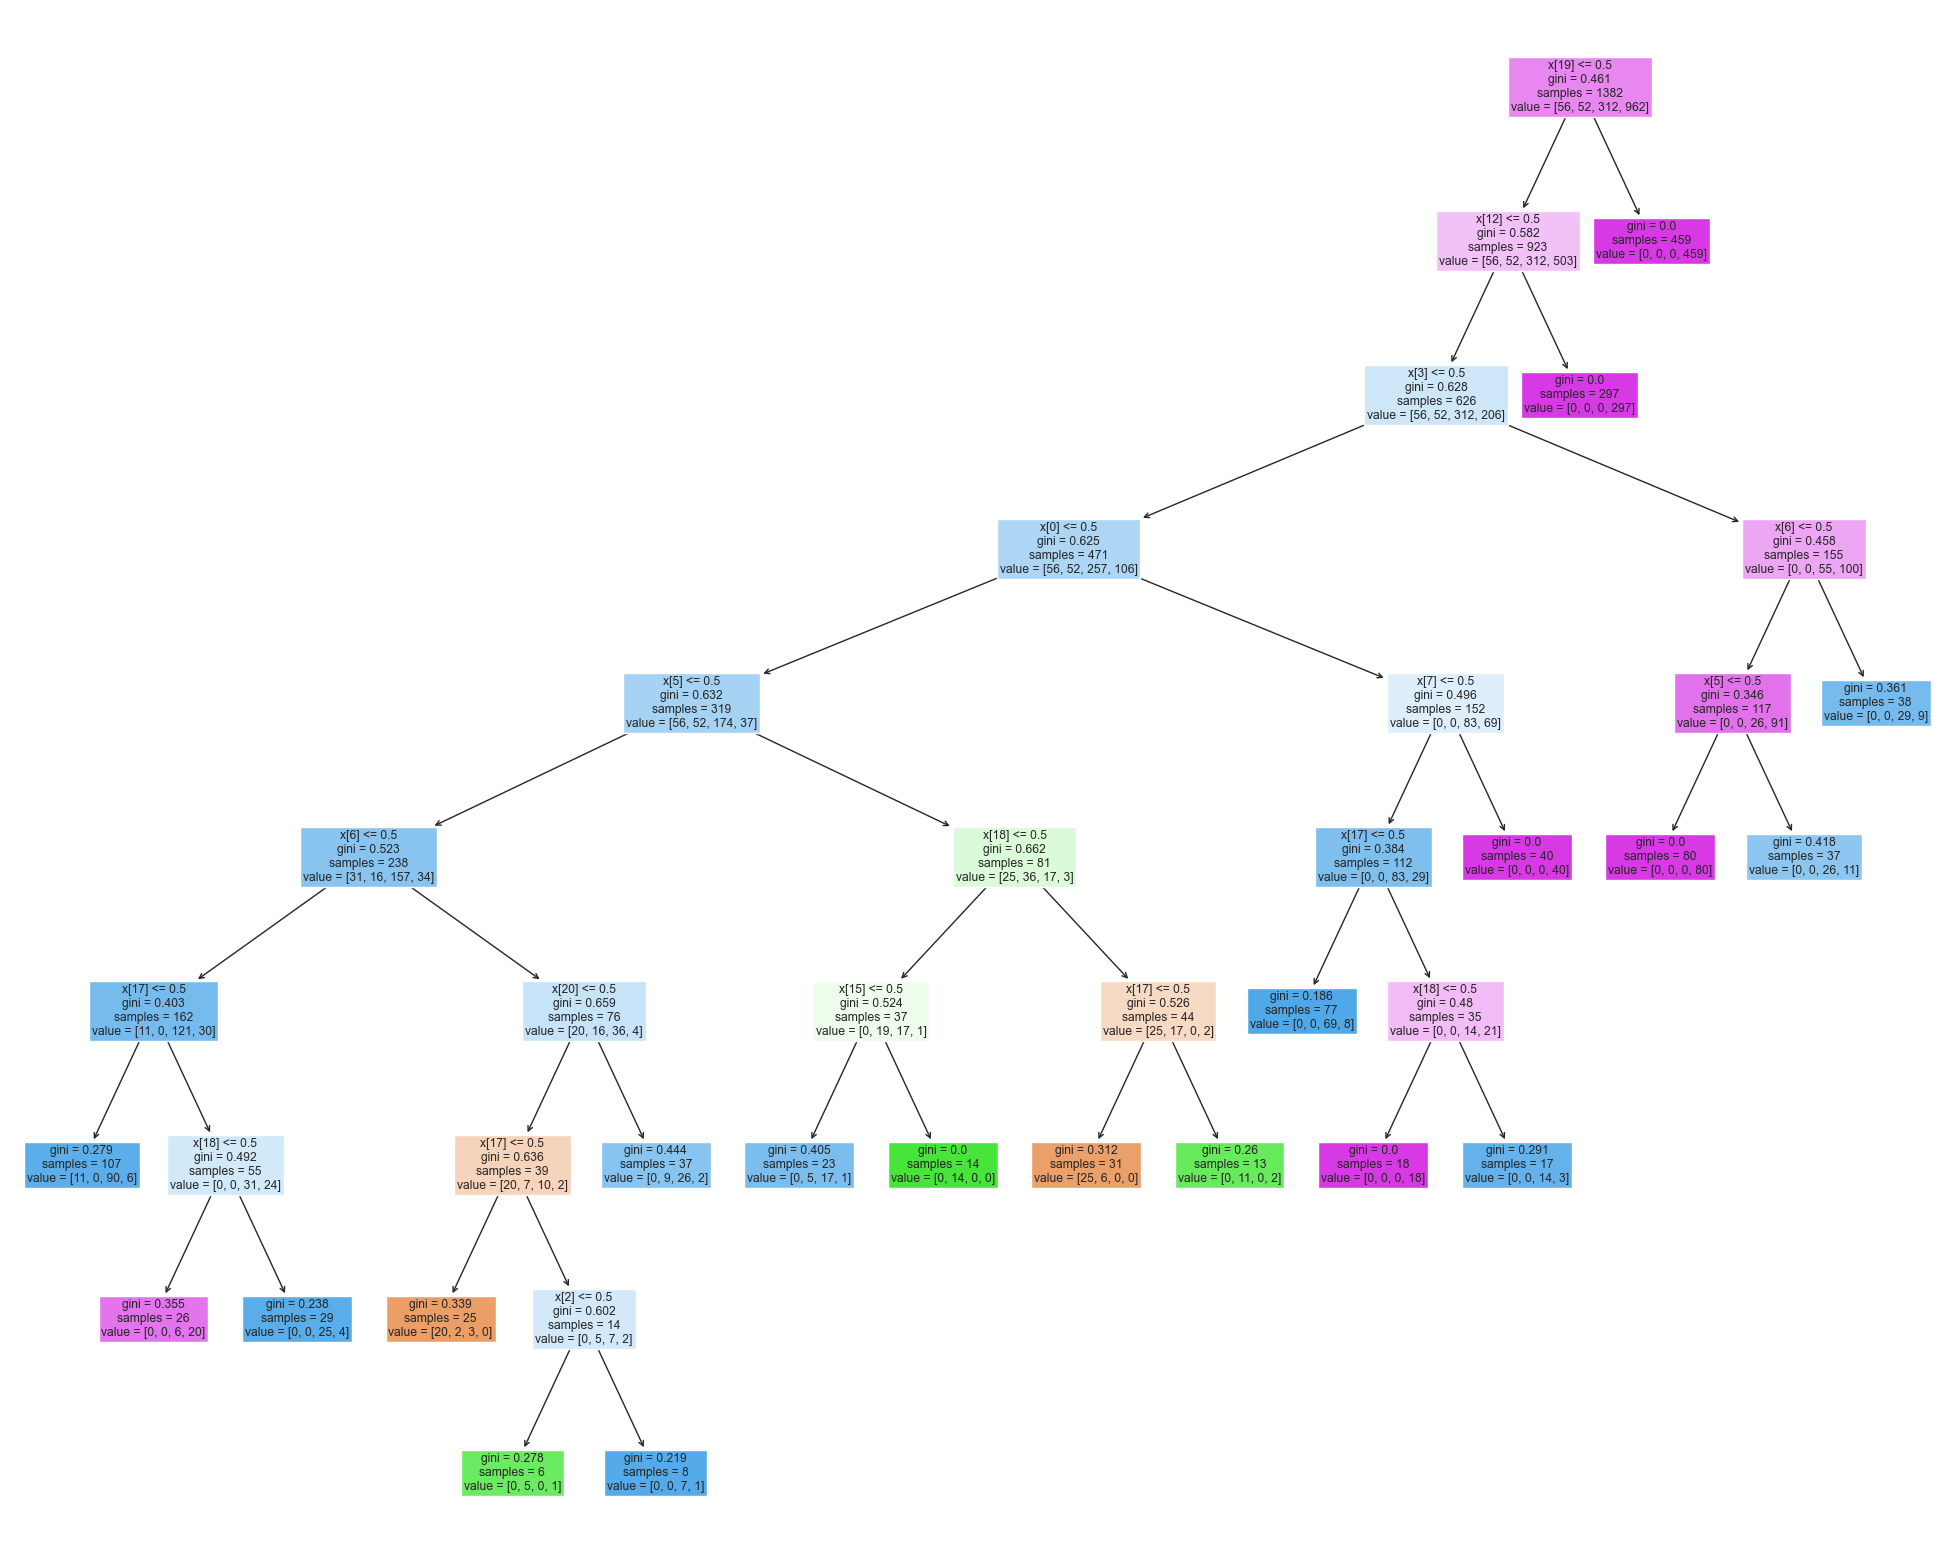

In [62]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [70]:
fig1 = plt.figure(figsize=(25,20))
dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2500x2000 with 0 Axes>

In [71]:
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [72]:
fig.savefig("decistion_tree.png")

# AUC ROC Curve

In [73]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


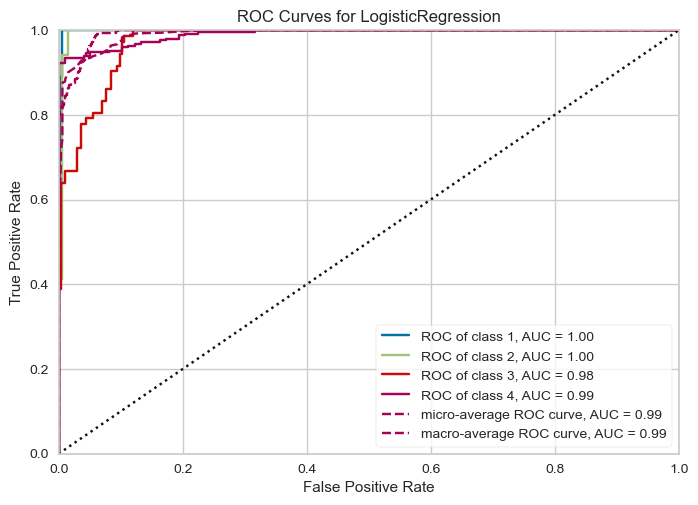

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [74]:
visualizer2 = ROCAUC(logi)
visualizer2.fit(X_train_LR, y_train_LR)        
visualizer2.score(X_test_LR, y_test_LR)     
visualizer2.show()

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


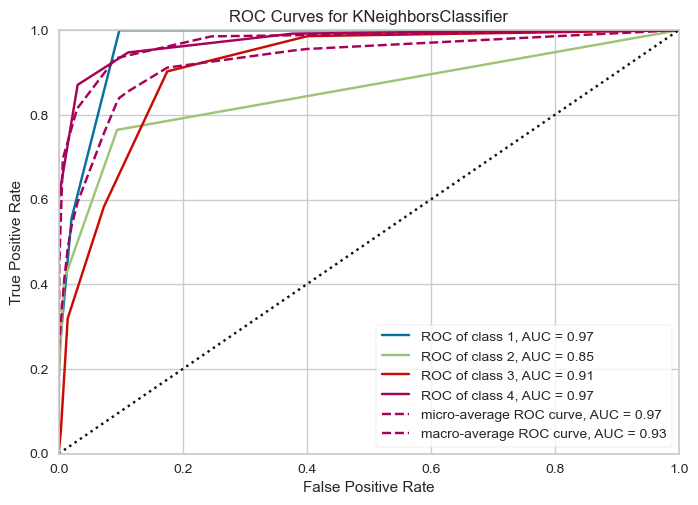

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
visualizer = ROCAUC(knn)
visualizer.fit(X_train_knn, y_train_knn)        # Fit the training data to the visualizer
visualizer.score(X_test_knn, y_test_knn)        # Evaluate the model on the test data
visualizer.show()

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


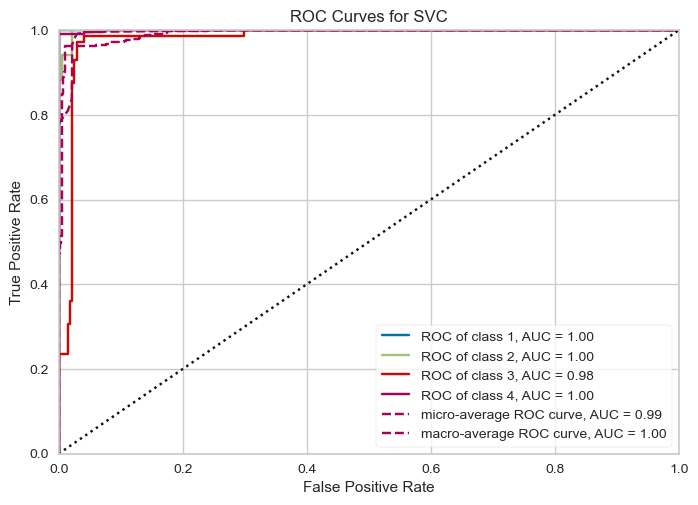

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
visualizer1 = ROCAUC(svm)
visualizer1.fit(X_train_svm, y_train_svm)        # Fit the training data to the visualizer
visualizer1.score(X_test_svm, y_test_svm)        # Evaluate the model on the test data
visualizer1.show()

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


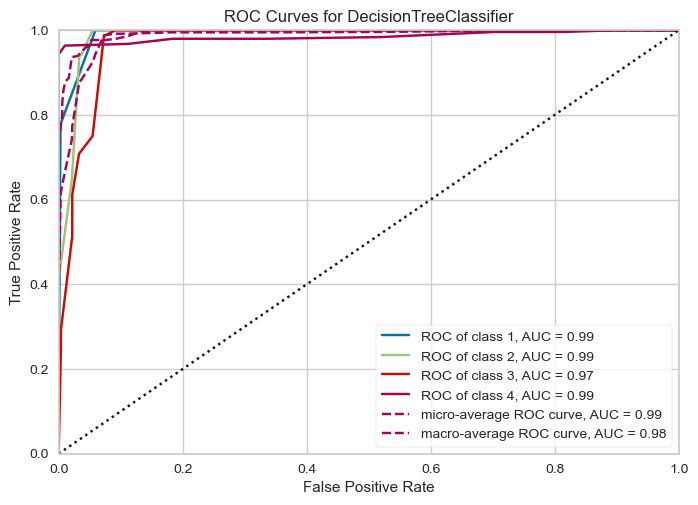

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
visualizer3 = ROCAUC(clf)
visualizer3.fit(X_train_DT, y_train_DT)        # Fit the training data to the visualizer
visualizer3.score(X_test_DT, y_test_DT)        # Evaluate the model on the test data
visualizer3.show()